<a href="https://colab.research.google.com/github/RTae/CPE463/blob/main/week6/CPE463_Assigment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("./IMG_1302.png", cv2.IMREAD_GRAYSCALE)

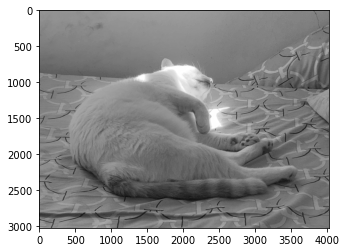

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
img_temp = img.copy()

# 2

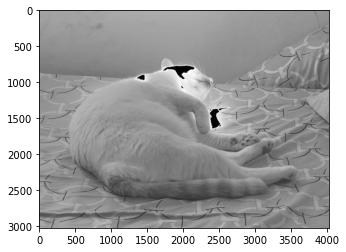

In [ ]:
img_liner = 1*img_temp + 5
plt.imshow(img_liner, cmap="gray")

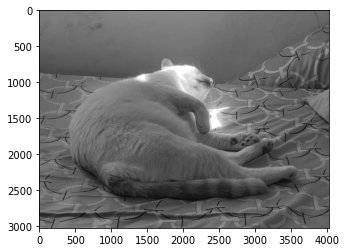

In [ ]:
img_power = 1*img_temp**1.4
plt.imshow(img_power, cmap="gray")

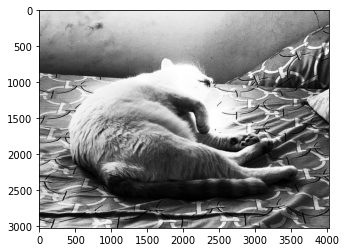

In [ ]:
img_hist = cv2.equalizeHist(img_temp)
plt.imshow(img_hist, cmap="gray")

(-0.5, 4031.5, 3023.5, -0.5)

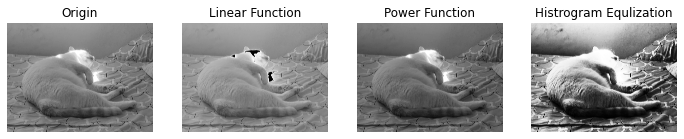

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(img_temp, cmap="gray")
axes[0].set_title("Origin")
axes[0].axis('off')

axes[1].imshow(img_liner, cmap="gray")
axes[1].set_title("Linear Function")
axes[1].axis('off')

axes[2].imshow(img_power, cmap="gray")
axes[2].set_title("Power Function")
axes[2].axis('off')

axes[3].imshow(img_hist, cmap="gray")
axes[3].set_title("Histrogram Equlization")
axes[3].axis('off')

# 3

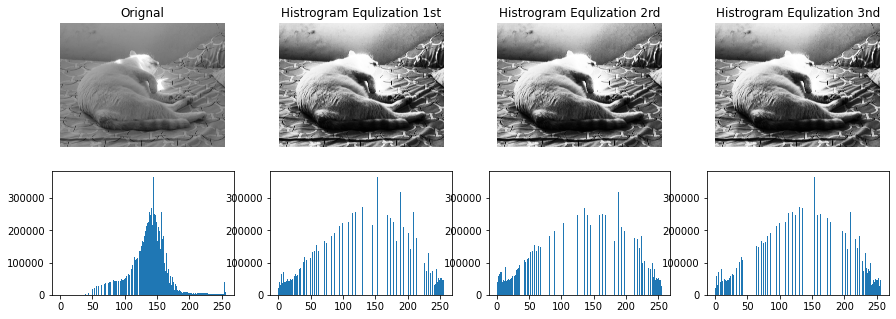

In [ ]:
img_hist_1 = cv2.equalizeHist(img_temp)
img_hist_2 = cv2.equalizeHist(img_hist_1)
img_hist_3 = cv2.equalizeHist(img_hist_2)

fig, axes = plt.subplots(2, 4, figsize=(15, 5))

axes[0,0].imshow(img_temp, cmap="gray")
axes[0, 0].set_title("Orignal")
axes[0, 0].axis('off')

axes[1,0].hist(img_temp.ravel(),256,[0,256]);

axes[0, 1].imshow(img_hist_1, cmap="gray")
axes[0, 1].set_title("Histrogram Equlization 1st")
axes[0, 1].axis('off')

axes[1,1].hist(img_hist_1.ravel(),256,[0,256]);

axes[0, 2].imshow(img_hist_2, cmap="gray")
axes[0, 2].set_title("Histrogram Equlization 2rd")
axes[0, 2].axis('off')

axes[1,2].hist(img_hist_2.ravel(),256,[0,256]);

axes[0, 3].imshow(img_hist_3, cmap="gray")
axes[0, 3].set_title("Histrogram Equlization 3nd")
axes[0, 3].axis('off')

axes[1,3].hist(img_hist_3.ravel(),256,[0,256]);

# 5

(-0.5, 499.5, 334.5, -0.5)

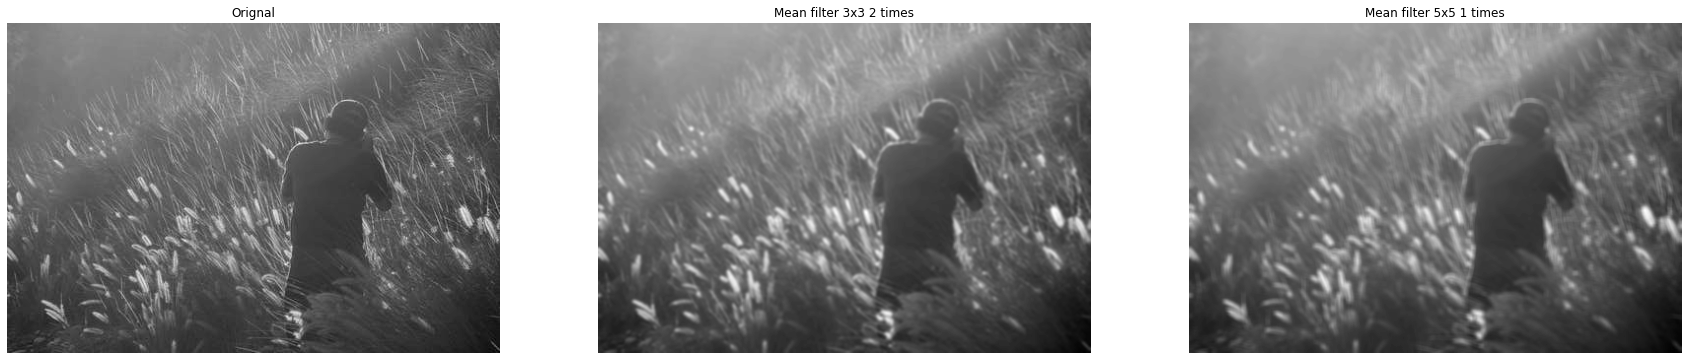

In [ ]:
img_home = cv2.imread("/content/sample_image.png", 0)

kernel_blur_3 = np.ones((3,3))/9
kernel_blur_5 = np.ones((5,5))/25

blur_image_3 = cv2.filter2D(img_home, -1, kernel_blur_3)
blur_image_3 = cv2.filter2D(blur_image_3, -1, kernel_blur_3)

blur_image_5 = cv2.filter2D(img_home, -1, kernel_blur_5)

fig, axes = plt.subplots(1, 3, figsize=(30, 30))

axes[0].imshow(img_home, cmap="gray")
axes[0].set_title("Orignal")
axes[0].axis('off')

axes[1].imshow(blur_image_3, cmap="gray")
axes[1].set_title("Mean filter 3x3 2 times")
axes[1].axis('off')

axes[2].imshow(blur_image_5, cmap="gray")
axes[2].set_title("Mean filter 5x5 1 times")
axes[2].axis('off')

# 6


In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://images.pexels.com/photos/584378/black-and-white-light-taking-take-a-photo-584378.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500")

file = open("sample_image.png", "wb")
file.write(response.content)
file.close()

(-0.5, 499.5, 334.5, -0.5)

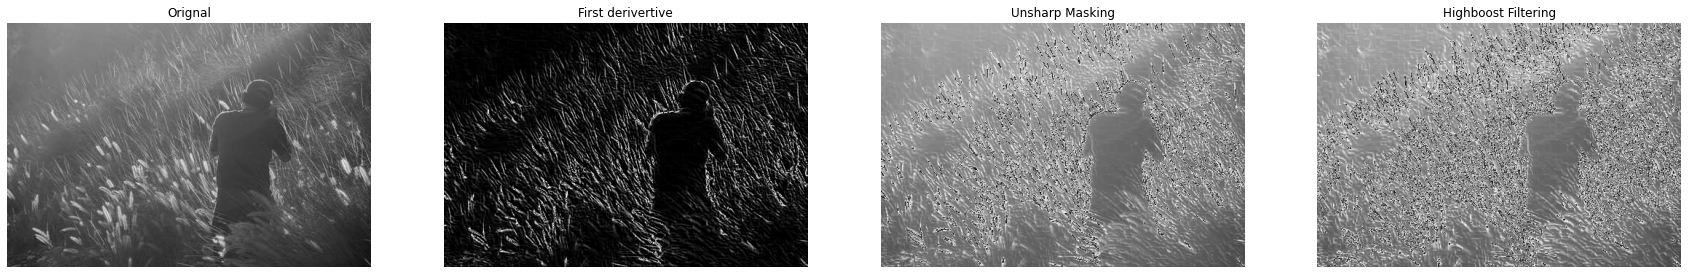

In [ ]:
img_home = cv2.imread("/content/sample_image.png", 0)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

soble_x_image = cv2.filter2D(img_home, -1, sobel_x)
soble_y_image = cv2.filter2D(img_home, -1, sobel_y)

sobelx_y = soble_x_image + soble_y_image

unsharp = img_home + sobelx_y

highboost = img_home + 2*sobelx_y

fig, axes = plt.subplots(1, 4, figsize=(30, 30))

axes[0].imshow(img_home, cmap="gray")
axes[0].set_title("Orignal")
axes[0].axis('off')

axes[1].imshow(sobelx_y, cmap="gray")
axes[1].set_title("First derivertive")
axes[1].axis('off')

axes[2].imshow(unsharp, cmap="gray")
axes[2].set_title("Unsharp Masking")
axes[2].axis('off')

axes[3].imshow(highboost, cmap="gray")
axes[3].set_title("Highboost Filtering")
axes[3].axis('off')

(-0.5, 499.5, 334.5, -0.5)

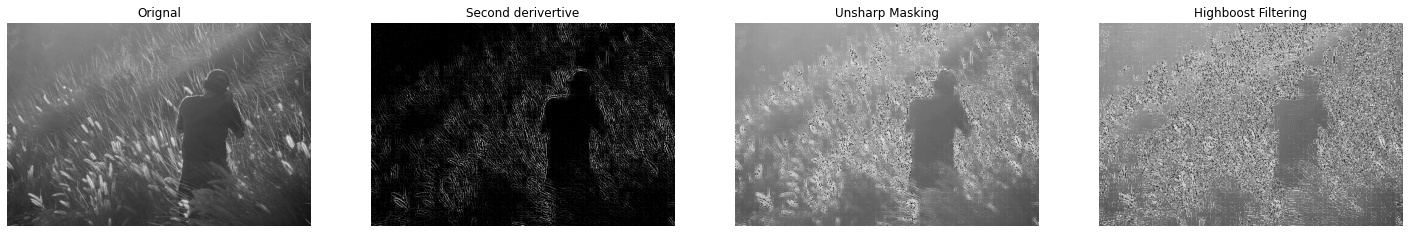

In [ ]:
laplacian_kernel = np.array([[1,  1, 1],
                             [1, -8, 1],
                             [1,  1, 1]])

laplacian = cv2.filter2D(img_home, -1, laplacian_kernel)

unsharp = img_home + laplacian

highboost = img_home + 3*laplacian

fig, axes = plt.subplots(1, 4, figsize=(25, 25))

axes[0].imshow(img_home, cmap="gray")
axes[0].set_title("Orignal")
axes[0].axis('off')

axes[1].imshow(laplacian, cmap="gray")
axes[1].set_title("Second derivertive")
axes[1].axis('off')

axes[2].imshow(unsharp, cmap="gray")
axes[2].set_title("Unsharp Masking")
axes[2].axis('off')

axes[3].imshow(highboost, cmap="gray")
axes[3].set_title("Highboost Filtering")
axes[3].axis('off')

# 8

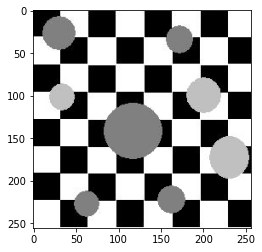

In [ ]:
img_table = cv2.imread("/content/circles.bmp")
img_table = cv2.cvtColor(img_table, cv2.COLOR_BGR2RGB)

plt.imshow(img_table, cmap='gray')

Number of circle:  8


(-0.5, 255.5, 255.5, -0.5)

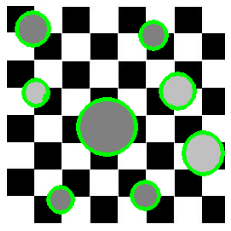

In [ ]:
# Define our color selection criteria in HSV values
lower_hue = np.array([0,0,40]) 
upper_hue = np.array([255,255,215])

img_hsv = cv2.cvtColor(img_table, cv2.COLOR_RGB2HSV)

mask_hsv = cv2.inRange(img_hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(img_table)
masked_image[mask_hsv==0] = [0,0,0]

masked_image = cv2.cvtColor(masked_image,cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(masked_image, 40, 215, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

temp_arry = []
for idx_contour in range(len(contours)):
  temp_arry.append(not (contours[idx_contour].shape[0] < 20))

contours_image = np.copy(img_table)

contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

print("Number of circle: ",sum(temp_arry))

plt.imshow(contours_image, cmap="gray")
plt.axis('off')

# 9

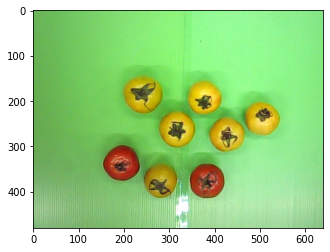

In [ ]:
img_T1 = cv2.imread("/content/T1.jpg")
img_T1 = cv2.cvtColor(img_T1, cv2.COLOR_BGR2RGB)

plt.imshow(img_T1, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


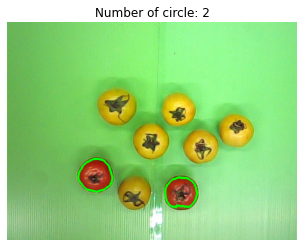

In [ ]:
# Define range for value to filter green and yello out
lower_hue = np.array([0,0,0]) 
upper_hue = np.array([10,255,255])

# Convert image to HSV color space
img_hsv = cv2.cvtColor(img_T1, cv2.COLOR_RGB2HSV)

# Filter the image
mask_hsv = cv2.inRange(img_hsv, lower_hue, upper_hue)

# Masking the image
masked_image = np.copy(img_T1)
masked_image[mask_hsv==0] = [0,0,0]

# Convert mask image to gray scale image
masked_image = cv2.cvtColor(masked_image,cv2.COLOR_RGB2GRAY)

# Use color tresholding to create binary image
retval, binary = cv2.threshold(masked_image, 40, 215, cv2.THRESH_BINARY)

# Find contours of image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Remove not circle contours by size
temp_arry = []
for idx_contour in range(len(contours)):
  temp_arry.append(not (contours[idx_contour].shape[0] < 70))
contours_image = np.copy(img_T1)
contours = np.array(contours)
temp_arry = np.array(temp_arry)
contours = contours[temp_arry]

# Draw contours on image
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

# Show draw image
plt.imshow(contours_image, cmap="gray")
plt.title("Number of circle: "+str(sum(temp_arry))) 
plt.axis('off')
plt.show()

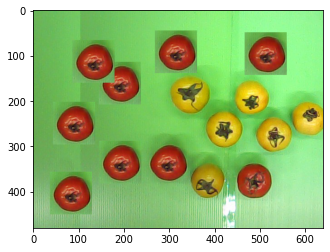

In [ ]:
img_T2 = cv2.imread("/content/T2.bmp")
img_T2 = cv2.cvtColor(img_T1, cv2.COLOR_BGR2RGB)

plt.imshow(img_T1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


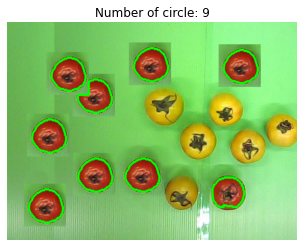

In [ ]:
# Define range for value to filter green and yello out
lower_hue = np.array([0,0,0]) 
upper_hue = np.array([10,255,255])

# Convert image to HSV color space
img_hsv = cv2.cvtColor(img_T1, cv2.COLOR_RGB2HSV)

# Filter the image
mask_hsv = cv2.inRange(img_hsv, lower_hue, upper_hue)

# Masking the image
masked_image = np.copy(img_T1)
masked_image[mask_hsv==0] = [0,0,0]

# Convert mask image to gray scale image
masked_image = cv2.cvtColor(masked_image,cv2.COLOR_RGB2GRAY)

# Use color tresholding to create binary image
retval, binary = cv2.threshold(masked_image, 40, 215, cv2.THRESH_BINARY)

# Find contours of image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Remove not circle contours by size
temp_arry = []
for idx_contour in range(len(contours)):
  temp_arry.append(not (contours[idx_contour].shape[0] < 100))
contours_image = np.copy(img_T1)
contours = np.array(contours)
temp_arry = np.array(temp_arry)
contours = contours[temp_arry]

# Draw contours on image
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

# Show draw image
plt.imshow(contours_image, cmap="gray")
plt.title("Number of circle: "+str(sum(temp_arry))) 
plt.axis('off')
plt.show()

# 10

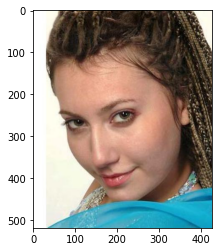

In [ ]:
img_human = cv2.imread("/content/input.jpg")
img_human = cv2.cvtColor(img_human, cv2.COLOR_BGR2RGB)

plt.imshow(img_human)

(1272, 1, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


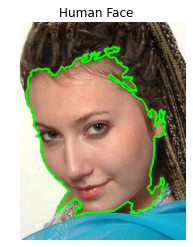

In [ ]:
# Define range for value to filter only skin
lower_hue = np.array([0, 30, 80])
upper_hue = np.array([16, 150, 255])

# Convert image to HSV color space
img_human_hsv = cv2.cvtColor(img_human, cv2.COLOR_RGB2HSV)

# Filter the image
mask_hsv = cv2.inRange(img_human_hsv, lower_hue, upper_hue)

# Masking the image
masked_image = np.copy(img_human)
masked_image[mask_hsv==0] = [0,0,0]

# Convert mask image to gray scale image
masked_image = cv2.cvtColor(masked_image,cv2.COLOR_RGB2GRAY)

# Use color tresholding to create binary image
_, binary = cv2.threshold(masked_image, 40, 215, cv2.THRESH_BINARY)

# Find contours of image
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Remove not skin contours by size
temp_array = []
for idx_contour in range(len(contours)):
    temp_array.append(not (contours[idx_contour].shape[0] < 400))
    if (contours[idx_contour].shape[0] > 400):
      print(contours[idx_contour].shape)

contours_image = np.copy(img_human)
contours = np.array(contours)
temp_array = np.array(temp_array)
contours = contours[temp_array]

# Draw contours on image
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

# Show draw image
plt.imshow(contours_image, cmap="gray")
plt.title("Human Face") 
plt.axis('off')
plt.show()

#7

In [ ]:
import scipy.signal as sig

In [ ]:
 arr = np.array([[20,20,20,10,10,10,10,10,10],
                 [20,20,20,20,20,20,20,20,10],
                 [20,20,20,10,10,10,10,20,10],
                 [20,20,10,10,10,10,10,20,10],
                 [20,10,10,10,10,10,10,20,10],
                 [10,10,10,10,20,10,10,20,10],
                 [10,10,10,10,10,10,10,10,10],
                 [10,10,10,20,10,10,10,20,20],
                 [10,10,10,20,10,10,20,10,20],
                 ])

In [ ]:
kernel_1 = np.array([[-1, -1, -1],
                     [-1, 8,  -1],
                     [-1, -1,  -1],
                     ])

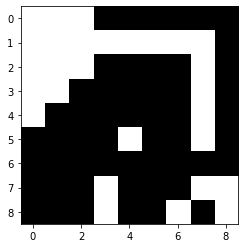

In [ ]:
plt.imshow(arr, cmap='gray')

In [ ]:
x2 = sig.convolve2d(arr, kernel_1, mode="same")

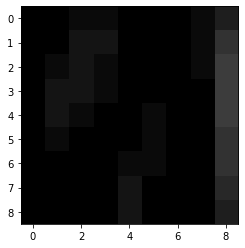

In [ ]:
plt.imshow(x, cmap='gray',  vmin=0, vmax=255)

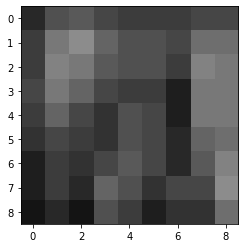

In [ ]:
plt.imshow(x1, cmap='gray', vmin=0, vmax=255)

In [ ]:
x2

array([[100,  60,  70, -10,   0,   0,   0,  10,  40],
       [ 60,   0,  20,  40,  60,  60,  50,  60,  10],
       [ 60,  10,  30, -40, -30, -30, -50,  50,   0],
       [ 70,  30, -30, -10,   0,   0, -30,  60,   0],
       [ 90, -30, -10, -10, -10, -10, -30,  60,   0],
       [ 20, -10,   0, -10,  80, -10, -20,  70,  10],
       [ 30,   0, -10, -20, -20, -10, -20, -30,   0],
       [ 30,   0, -20,  70, -20, -10, -20,  50,  90],
       [ 50,  30,  10, 100,  10,  20, 100, -10, 110]])

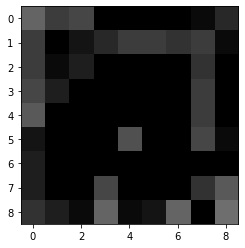

In [ ]:
plt.imshow(x2, cmap='gray', vmin=0, vmax=255)

In [ ]:
x3

array([[ 40,  20,  30, -10,   0,   0,   0,   0,  20],
       [ 20,   0,   0,  20,  20,  20,  20,  20,   0],
       [ 20,   0,  20, -20, -10, -10, -20,  20,   0],
       [ 20,  20, -20,   0,   0,   0, -10,  20,   0],
       [ 40, -20,   0,   0, -10,   0, -10,  20,   0],
       [  0,   0,   0, -10,  40, -10, -10,  30,   0],
       [ 10,   0,   0, -10, -10,   0,   0, -20,   0],
       [ 10,   0, -10,  30, -10,   0, -20,  30,  30],
       [ 20,  10,   0,  40,   0,   0,  50, -20,  50]])

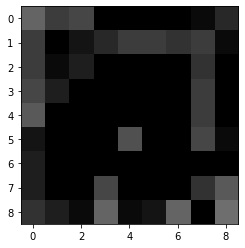

In [ ]:
plt.imshow(x3, cmap='gray', vmin=0, vmax=255)